Features in the California Housing Dataset:
Feature Name    Description
MedInc          - MedInc        median income in block group
HouseAge        - HouseAge      median house age in block group
AveRooms        - AveRooms      average number of rooms per household
AveBedrms       - AveBedrms     average number of bedrooms per household
Population      - Population    block group population
AveOccup        - AveOccup      average number of household members
Latitude        - Latitude      block group latitude
Longitude       - Longitude     block group longitude

Sample of the Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281

<Figure size 800x600 with 0 Axes>

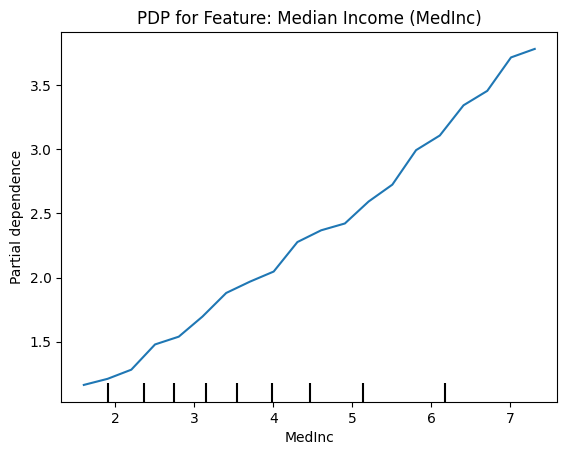

<Figure size 800x600 with 0 Axes>

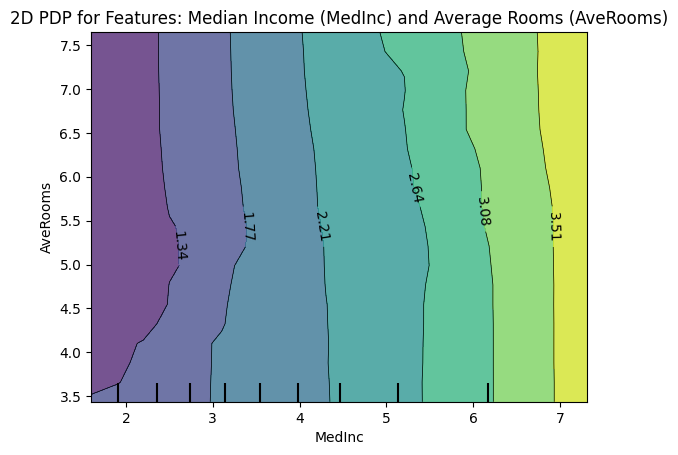

In [2]:
# Install necessary libraries
!pip install --upgrade scikit-learn
!pip install matplotlib

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Load California Housing Dataset
data = fetch_california_housing()
# Display Feature Names and Descriptions
print("Features in the California Housing Dataset:")
print(f"{'Feature Name':<15} Description")
print("="*50)
for name, desc in zip(data.feature_names, data.DESCR.split("\n")[12:20]):
    print(f"{name:<15} {desc.strip()}")

# To view all features and target as a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
print("\nSample of the Dataset:")
print(df.head())
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Generate Partial Dependence Plot for a single feature
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_train, ["MedInc"], feature_names=data.feature_names, grid_resolution=20)
plt.title("PDP for Feature: Median Income (MedInc)")
plt.show()

# Generate 2D Partial Dependence Plot for two interacting features
plt.figure(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_train, [("MedInc", "AveRooms")], feature_names=data.feature_names, grid_resolution=20)
plt.title("2D PDP for Features: Median Income (MedInc) and Average Rooms (AveRooms)")
plt.show()
